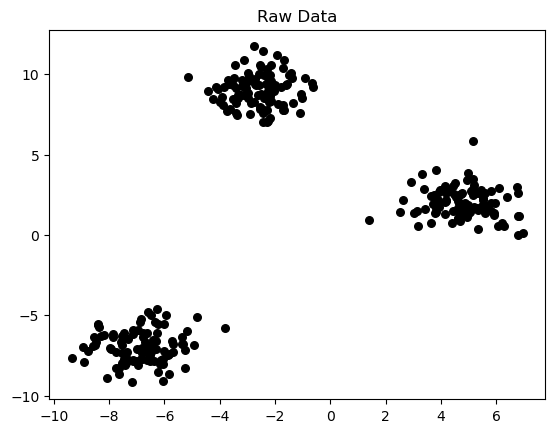

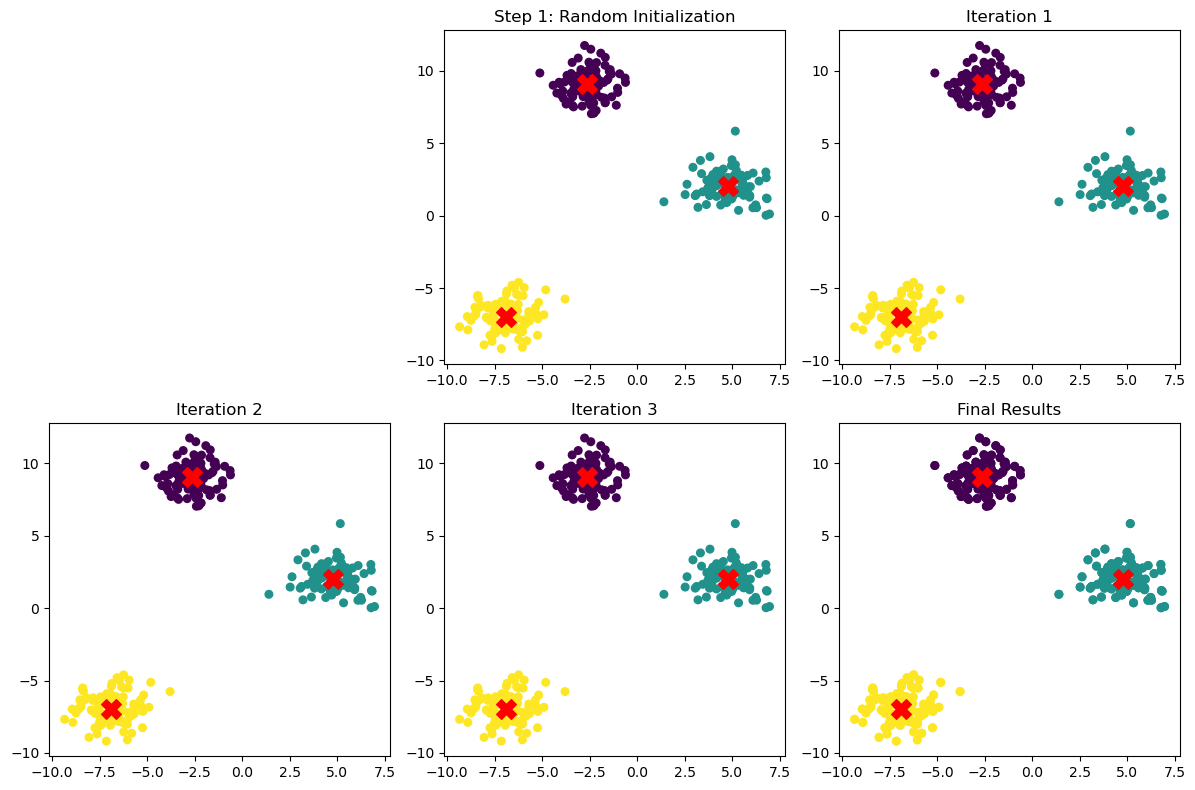

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")  # Suppress sklearn warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from threadpoolctl import threadpool_limits


# Generate synthetic data
from sklearn.datasets import make_blobs
np.random.seed(42)
n_samples = 300
n_features = 2
n_clusters = 3

# Create synthetic dataset
data, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.0, random_state=42)

# Apply threadpool limits and fit KMeans
with threadpool_limits(limits=2, user_api='blas'):
    # Initialize KMeans
    kmeans = KMeans(n_clusters=3, init='random', n_init=1, max_iter=300, random_state=42)
    # Fit the KMeans model
    kmeans.fit(data)

# Plot raw data
def plot_data(data):
    plt.scatter(data[:, 0], data[:, 1], c='black', s=30)
    plt.title("Raw Data")
    plt.show()

plot_data(data)

# K-means algorithm visualization
def kmeans_visualization(data, n_clusters, max_iterations=10):
    kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1, max_iter=1, random_state=42)
    
    plt.figure(figsize=(12, 8))
    
    # Step 1: Random initialization
    kmeans.fit(data)
    plt.subplot(2, 3, 2)
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, s=30, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
    plt.title("Step 1: Random Initialization")
    
    # Iterative process
    for iteration in range(max_iterations):
        # Step 2(a): Calculate new centroids
        kmeans = KMeans(n_clusters=n_clusters, init=kmeans.cluster_centers_, n_init=1, max_iter=1, random_state=42)
        kmeans.fit(data)
        
        plt.subplot(2, 3, 3 + iteration)
        plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, s=30, cmap='viridis')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
        plt.title(f"Iteration {iteration + 1}")
        
        # Stop after the final iteration
        if iteration == max_iterations - 1:
            break
    
    # Final Results
    plt.subplot(2, 3, 6)
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, s=30, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
    plt.title("Final Results")
    plt.tight_layout()
    plt.show()

# Call the visualization function
kmeans_visualization(data, n_clusters=3, max_iterations=4)


Converged in 3 iterations.
Final Objective Function Value: 555.5224


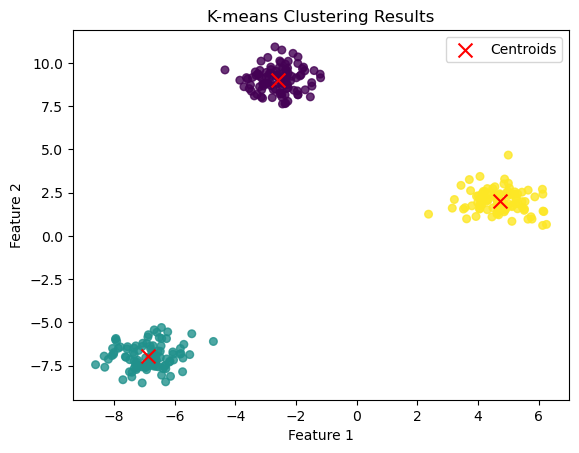

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)

# Objective function calculation
def compute_objective(X, centroids, labels):
    """
    Computes the objective function:
    Sum of pairwise squared distances within each cluster.
    """
    objective = 0
    for k in range(len(centroids)):
        # Select points belonging to cluster k
        cluster_points = X[labels == k]
        if len(cluster_points) > 1:
            # Compute pairwise squared distances
            pairwise_distances = np.sum(
                np.sum((cluster_points[:, np.newaxis, :] - cluster_points[np.newaxis, :, :]) ** 2, axis=-1)
            )
            objective += pairwise_distances / len(cluster_points)
    return objective

# K-means algorithm implementation
def kmeans(X, K, max_iters=100, tol=1e-4):
    """
    Performs K-means clustering.
    Arguments:
    - X: Data points (n_samples, n_features)
    - K: Number of clusters
    - max_iters: Maximum number of iterations
    - tol: Tolerance for convergence
    """
    n_samples, n_features = X.shape

    # Randomly initialize centroids
    centroids = X[np.random.choice(n_samples, K, replace=False)]

    for iteration in range(max_iters):
        # Step 1: Assign points to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Recompute centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # Step 3: Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            print(f"Converged in {iteration + 1} iterations.")
            break

        centroids = new_centroids

    # Compute the objective function
    objective = compute_objective(X, centroids, labels)

    return labels, centroids, objective

# Run K-means on the data
K = 3
labels, centroids, objective = kmeans(X, K)

print(f"Final Objective Function Value: {objective:.4f}")

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title("K-means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


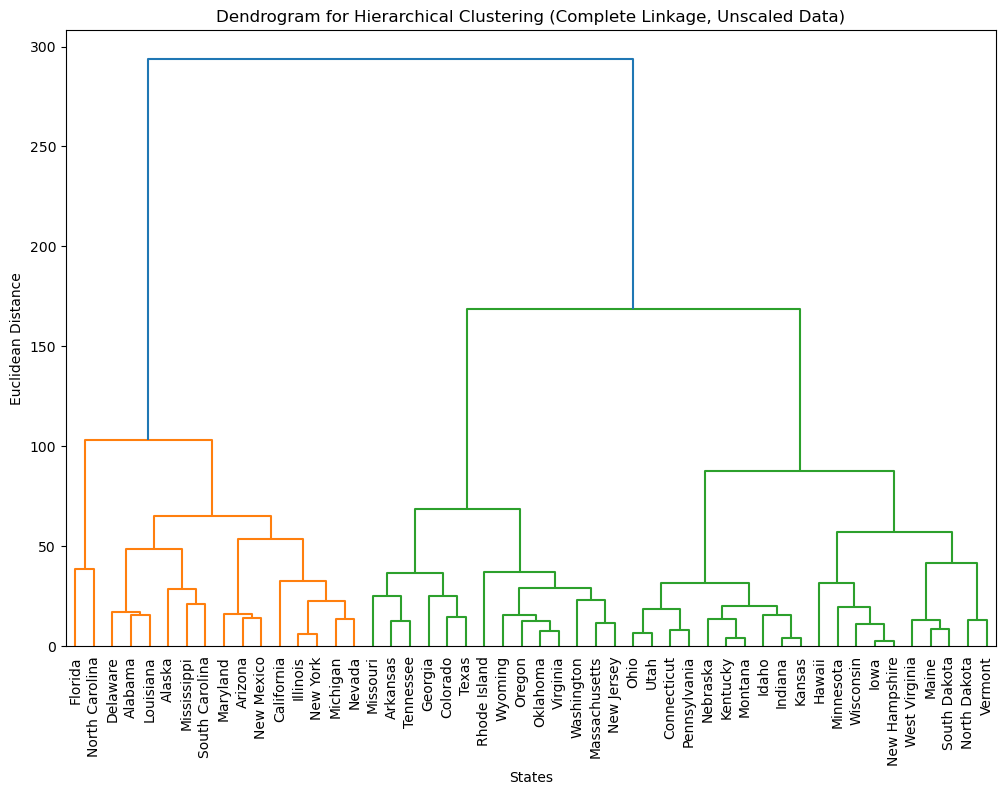

Cluster Assignments (Unscaled Data):
             State  Cluster
0          Alabama        1
21        Michigan        1
19        Maryland        1
30      New Mexico        1
17       Louisiana        1
31        New York        1
32  North Carolina        1
12        Illinois        1
27          Nevada        1
39  South Carolina        1
23     Mississippi        1
8          Florida        1
7         Delaware        1
4       California        1
2          Arizona        1
1           Alaska        1
36          Oregon        2
35        Oklahoma        2
42           Texas        2
45        Virginia        2
46      Washington        2
29      New Jersey        2
41       Tennessee        2
38    Rhode Island        2
24        Missouri        2
49         Wyoming        2
3         Arkansas        2
5         Colorado        2
20   Massachusetts        2
9          Georgia        2
47   West Virginia        3
44         Vermont        3
43            Utah        3
6      Conn

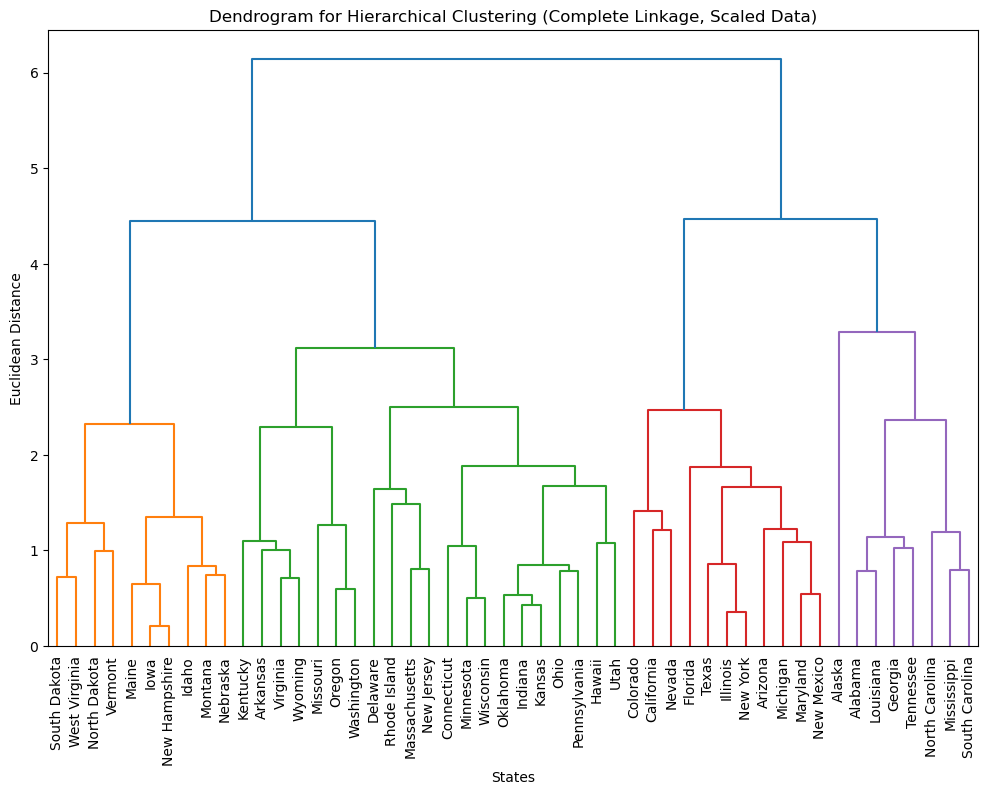

Cluster Assignments (Scaled Data):
             State  Cluster
24        Missouri        1
48       Wisconsin        1
25         Montana        1
26        Nebraska        1
28   New Hampshire        1
29      New Jersey        1
33    North Dakota        1
34            Ohio        1
35        Oklahoma        1
36          Oregon        1
37    Pennsylvania        1
38    Rhode Island        1
40    South Dakota        1
43            Utah        1
44         Vermont        1
45        Virginia        1
46      Washington        1
47   West Virginia        1
22       Minnesota        1
20   Massachusetts        1
49         Wyoming        1
10          Hawaii        1
18           Maine        1
3         Arkansas        1
16        Kentucky        1
15          Kansas        1
14            Iowa        1
13         Indiana        1
6      Connecticut        1
7         Delaware        1
11           Idaho        1
2          Arizona        2
4       California        2
5         Col

In [3]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/arman/Downloads/USArrests.csv'
usarrests_data = pd.read_csv(file_path)

# Extract state names and numeric data
state_names = usarrests_data['Unnamed: 0']
data = usarrests_data.drop(columns=['Unnamed: 0'])

# Perform hierarchical clustering (Unscaled Data)
linkage_matrix = sch.linkage(data, method='complete', metric='euclidean')

# Plot dendrogram (Unscaled Data)
plt.figure(figsize=(12, 8))
sch.dendrogram(linkage_matrix, labels=state_names.values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering (Complete Linkage, Unscaled Data)")
plt.xlabel("States")
plt.ylabel("Euclidean Distance")
plt.show()

# Cut dendrogram for 3 clusters (Unscaled Data)
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Display cluster assignments (Unscaled Data)
cluster_assignments = pd.DataFrame({'State': state_names, 'Cluster': clusters})
print("Cluster Assignments (Unscaled Data):")
print(cluster_assignments.sort_values(by='Cluster'))

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform hierarchical clustering (Scaled Data)
scaled_linkage_matrix = sch.linkage(scaled_data, method='complete', metric='euclidean')

# Plot dendrogram (Scaled Data)
plt.figure(figsize=(12, 8))
sch.dendrogram(scaled_linkage_matrix, labels=state_names.values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering (Complete Linkage, Scaled Data)")
plt.xlabel("States")
plt.ylabel("Euclidean Distance")
plt.show()

# Cut dendrogram for 3 clusters (Scaled Data)
scaled_clusters = fcluster(scaled_linkage_matrix, t=3, criterion='maxclust')

# Display cluster assignments (Scaled Data)
scaled_cluster_assignments = pd.DataFrame({'State': state_names, 'Cluster': scaled_clusters})
print("Cluster Assignments (Scaled Data):")
print(scaled_cluster_assignments.sort_values(by='Cluster'))


Scaled Data Mean (should be near 0): [-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16  2.49488320e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16]
Scaled Data Std Dev (should be near 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cumulative Variance Retained: 0.8016229275554786


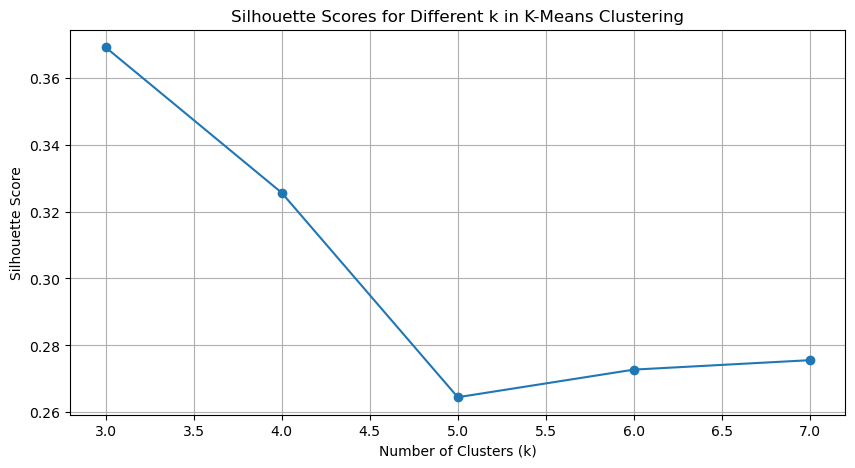

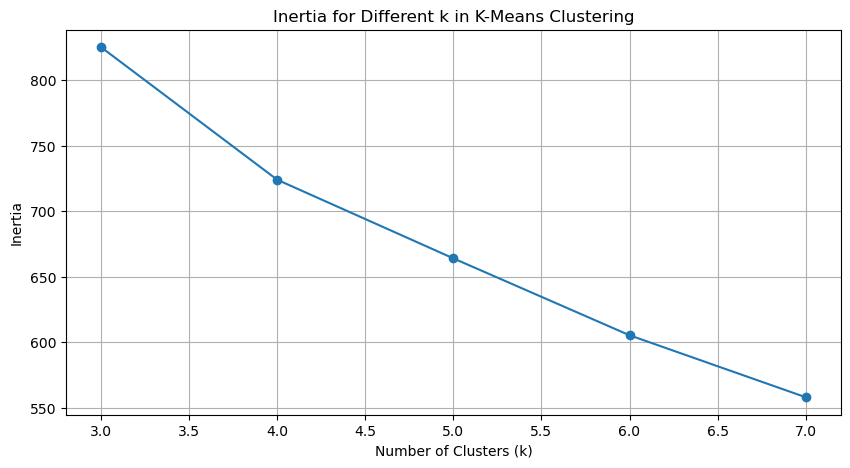

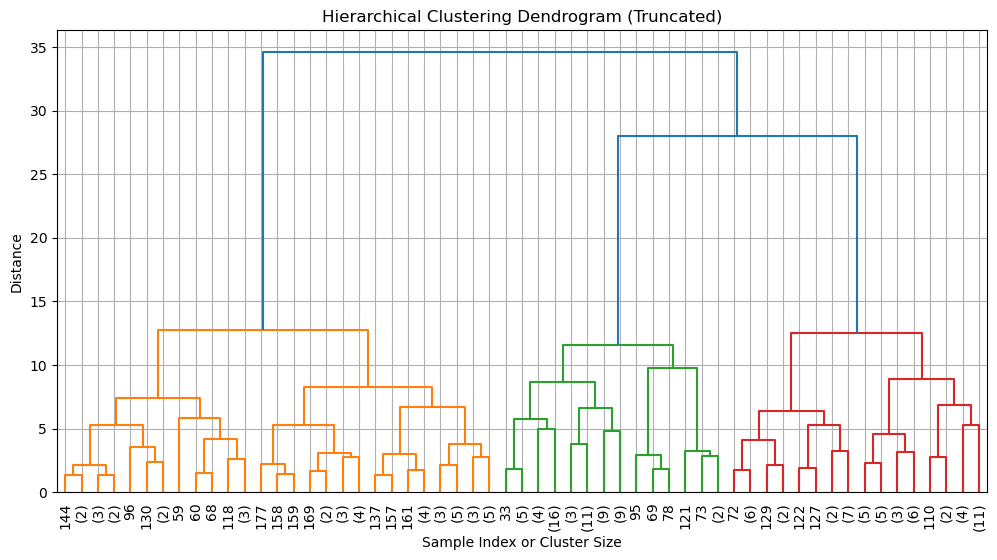

Cluster Centers (PCA Reduced Space):
 [[-3.69566084e-02 -1.77223945e+00  1.86138728e-01  8.02397126e-02
   7.08780744e-02]
 [-2.72003575e+00  1.12565126e+00 -2.39093241e-01  6.24569372e-02
   7.36759999e-02]
 [ 2.27619360e+00  9.32054027e-01  1.52803156e-03 -1.35498147e-01
  -1.34912110e-01]]


In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the dataset 
file_path = 'C:/Users/arman/Downloads/wine-clustering.csv'
wine_data = pd.read_csv(file_path)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_data)

# PCA: Dimensionality reduction to retain 80% variance
pca = PCA()
pca.fit(scaled_data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
pca_transformed_data = pca.transform(scaled_data)[:, :num_components_80]

# Verify PCA assumptions
print("Scaled Data Mean (should be near 0):", np.mean(scaled_data, axis=0))
print("Scaled Data Std Dev (should be near 1):", np.std(scaled_data, axis=0))
print("Cumulative Variance Retained:", cumulative_variance[num_components_80 - 1])

# K-Means Clustering: Evaluate different k values
k_values = range(3, 8)
silhouette_scores = []
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_transformed_data)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_transformed_data, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k in K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Plot Inertia Values
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Inertia for Different k in K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Hierarchical Clustering: Dendrogram
hierarchical_linkage = linkage(pca_transformed_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(hierarchical_linkage, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# K-Means Final Model (k=3 based on silhouette scores)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(pca_transformed_data)

# Print final cluster centers
print("Cluster Centers (PCA Reduced Space):\n", kmeans_final.cluster_centers_)
